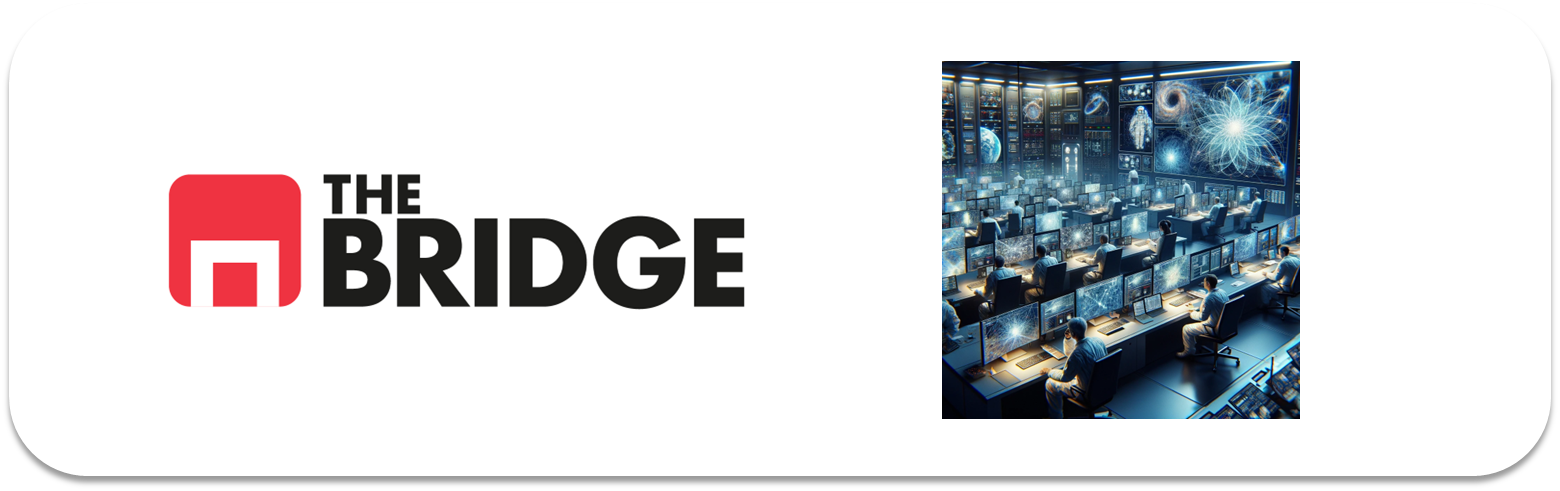

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [66]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense  
from tensorflow.keras.callbacks import EarlyStopping  

print("GPUs disponíveis:", len(tf.config.experimental.list_physical_devices('GPU')))

GPUs disponíveis: 1


In [67]:
import cv2
import glob  
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
# filter warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



In [68]:
train_dirs = [
    "data/github_train_0/*",
    "data/github_train_1/*",
    "data/github_train_2/*",
    "data/github_train_3/*"
]

test_dirs = ["data/github_test/*"]

# Pega todos os arquivos das pastas
train_files = []
for d in train_dirs:
    train_files.extend(glob.glob(d))

test_files = glob.glob(test_dirs[0])

In [80]:
def load_images(files):
    X = []
    y = []
    
    for file in files:
        img = cv2.imread(file)
        img = cv2.resize(img, (32, 32))
        X.append(img)

        if "cat" in file:
            y.append(0)
        elif "dog" in file:
            y.append(1)
    
    return np.array(X) / 255.0, np.array(y)

X_train, y_train = load_images(train_files)
X_test, y_test = load_images(test_files)

In [ ]:
print(f"X_train: {X_train.shape}")  
print(f"y_train: {y_train.shape}")  

print(f"X_test: {X_test.shape}")  
print(f"y_test: {y_test.shape}")  

unique, counts = np.unique(y_train, return_counts=True)
print(f"\nClases en entrenamiento: {dict(zip(unique, counts))}")

unique, counts = np.unique(y_test, return_counts=True)
print(f"Clases en prueba: {dict(zip(unique, counts))}")


X_train: (4000, 32, 32, 3)
y_train: (4000,)
X_test: (1000, 32, 32, 3)
y_test: (1000,)

Clases en entrenamiento: {0: 2000, 1: 2000}
Clases en prueba: {0: 500, 1: 500}


In [ ]:
model = keras.Sequential([
    # Primera capa Convolucional
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  
    # Segunda capa Convolucional
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    # 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])


Epoch 1/100
100/100 [==============================] - 2s 5ms/step - loss: 0.6667 - accuracy: 0.6166 - val_loss: 0.7404 - val_accuracy: 0.0037
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6406 - accuracy: 0.6463 - val_loss: 0.6531 - val_accuracy: 0.7163
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6095 - accuracy: 0.6625 - val_loss: 0.6455 - val_accuracy: 0.6550
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 0.5800 - accuracy: 0.6909 - val_loss: 0.6731 - val_accuracy: 0.6212
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.5594 - accuracy: 0.7097 - val_loss: 0.7047 - val_accuracy: 0.5863
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 0.5404 - accuracy: 0.7331 - val_loss: 0.5768 - val_accuracy: 0.7000
Epoch 7/100
100/100 [==============================] - 0s 4ms/step - loss: 0.5131 - accuracy: 0.7453 - val_loss: 0.5965 - val_accuracy: 0.6762

### Evaluación contra prueba

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.65      0.70       500
           1       0.70      0.81      0.75       500

    accuracy                           0.73      1000
   macro avg       0.74      0.73      0.73      1000
weighted avg       0.74      0.73      0.73      1000



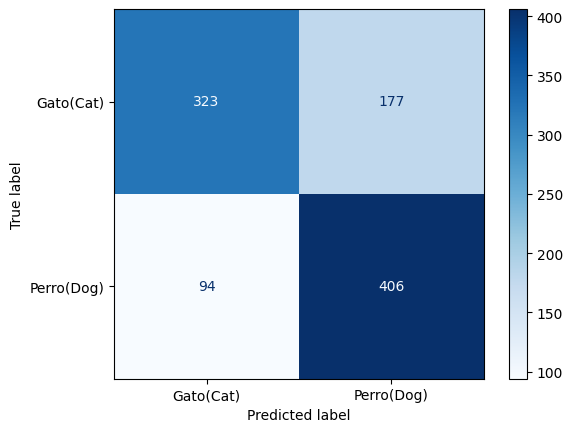

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Gato(Cat)", "Perro(Dog)"])
disp.plot(cmap='Blues')
plt.show()

### 10% de imágenes con peores clasificaciones

In [ ]:
mis_classification = np.where(y_pred.flatten() != y_test)[0]
mis_classification

array([  0,   1,   3,   4,   8,  10,  13,  16,  19,  20,  21,  24,  25,
        26,  27,  29,  33,  36,  44,  56,  59,  60,  63,  65,  68,  70,
        74,  75,  76,  82,  83,  84,  86,  89,  93,  97, 102, 105, 107,
       111, 118, 119, 120, 121, 123, 124, 127, 135, 136, 137, 141, 144,
       145, 148, 150, 153, 154, 156, 159, 160, 175, 177, 178, 180, 183,
       186, 188, 197, 199, 204, 205, 206, 214, 215, 216, 218, 222, 223,
       224, 225, 227, 229, 233, 236, 237, 239, 241, 242, 243, 244, 246,
       247, 248, 249, 250, 252, 253, 254, 255, 258, 259, 260, 261, 263,
       266, 267, 272, 274, 277, 284, 285, 286, 289, 290, 291, 292, 295,
       296, 299, 306, 310, 311, 318, 320, 323, 328, 331, 337, 339, 341,
       342, 344, 350, 353, 355, 359, 360, 361, 363, 364, 366, 368, 381,
       387, 396, 397, 399, 400, 404, 406, 420, 423, 431, 434, 435, 436,
       438, 441, 449, 455, 458, 459, 461, 462, 467, 468, 469, 472, 474,
       476, 480, 489, 490, 491, 492, 493, 495, 509, 523, 531, 53

In [76]:
mis_classification_prob_dict = {i: y_pred_probs[i] for i in mis_classification}

mis_classification_prob = list(mis_classification_prob_dict.values())

print("Valores en mis_classification:", len(mis_classification))
print("Valores en mis_classification_prob_dict:", len(mis_classification_prob_dict))
print(mis_classification_prob_dict)

Valores en mis_classification: 271
Valores en mis_classification_prob_dict: 271
{0: array([0.72541314], dtype=float32), 1: array([0.5212022], dtype=float32), 3: array([0.62874067], dtype=float32), 4: array([0.68569213], dtype=float32), 8: array([0.8004487], dtype=float32), 10: array([0.7932223], dtype=float32), 13: array([0.9074258], dtype=float32), 16: array([0.82580817], dtype=float32), 19: array([0.67597914], dtype=float32), 20: array([0.649552], dtype=float32), 21: array([0.58270043], dtype=float32), 24: array([0.5722238], dtype=float32), 25: array([0.5376365], dtype=float32), 26: array([0.66722167], dtype=float32), 27: array([0.76280713], dtype=float32), 29: array([0.5573768], dtype=float32), 33: array([0.53471094], dtype=float32), 36: array([0.60318923], dtype=float32), 44: array([0.8872847], dtype=float32), 56: array([0.50392294], dtype=float32), 59: array([0.5251272], dtype=float32), 60: array([0.6141032], dtype=float32), 63: array([0.59036255], dtype=float32), 65: array([0.544

In [72]:
worst_classification = sorted(np.abs(mis_classification_prob-0.5), reverse=True)
worst_classification = worst_classification[:int(len(worst_classification) * 0.1)]
print(worst_classification)
print("length:", len(worst_classification))

[array([0.48445868], dtype=float32), array([0.46408743], dtype=float32), array([0.4591387], dtype=float32), array([0.44731063], dtype=float32), array([0.43192112], dtype=float32), array([0.42957935], dtype=float32), array([0.41809112], dtype=float32), array([0.41768992], dtype=float32), array([0.4155405], dtype=float32), array([0.41530108], dtype=float32), array([0.4142359], dtype=float32), array([0.4126504], dtype=float32), array([0.41062307], dtype=float32), array([0.40742582], dtype=float32), array([0.40547907], dtype=float32), array([0.39891106], dtype=float32), array([0.39235842], dtype=float32), array([0.3902459], dtype=float32), array([0.3872847], dtype=float32), array([0.38182086], dtype=float32), array([0.3768767], dtype=float32), array([0.3733558], dtype=float32), array([0.36627805], dtype=float32), array([0.3618452], dtype=float32), array([0.3575515], dtype=float32), array([0.35639882], dtype=float32), array([0.356319], dtype=float32)]
length: 27


In [79]:
worst_classification = [(i, np.abs(val - 0.5)) for i, val in mis_classification_prob_dict.items()]

worst_classification = sorted(worst_classification, key=lambda x: x[1], reverse=True)

worst_classification = worst_classification[:int(len(worst_classification) * 0.1)]

print(worst_classification)
print("Número de valores:",len(worst_classification))

[(337, array([0.48445868], dtype=float32)), (851, array([0.46408743], dtype=float32)), (229, array([0.4591387], dtype=float32)), (871, array([0.44731063], dtype=float32)), (344, array([0.43192112], dtype=float32)), (740, array([0.42957935], dtype=float32)), (397, array([0.41809112], dtype=float32)), (368, array([0.41768992], dtype=float32)), (893, array([0.4155405], dtype=float32)), (359, array([0.41530108], dtype=float32)), (537, array([0.4142359], dtype=float32)), (284, array([0.4126504], dtype=float32)), (97, array([0.41062307], dtype=float32)), (13, array([0.40742582], dtype=float32)), (619, array([0.40547907], dtype=float32)), (969, array([0.39891106], dtype=float32)), (153, array([0.39235842], dtype=float32)), (598, array([0.3902459], dtype=float32)), (44, array([0.3872847], dtype=float32)), (680, array([0.38182086], dtype=float32)), (291, array([0.3768767], dtype=float32)), (175, array([0.3733558], dtype=float32)), (509, array([0.36627805], dtype=float32)), (331, array([0.361845

In [84]:
misclassified_images = [X_test[i] for i, _ in worst_classification]
len(misclassified_images)

27

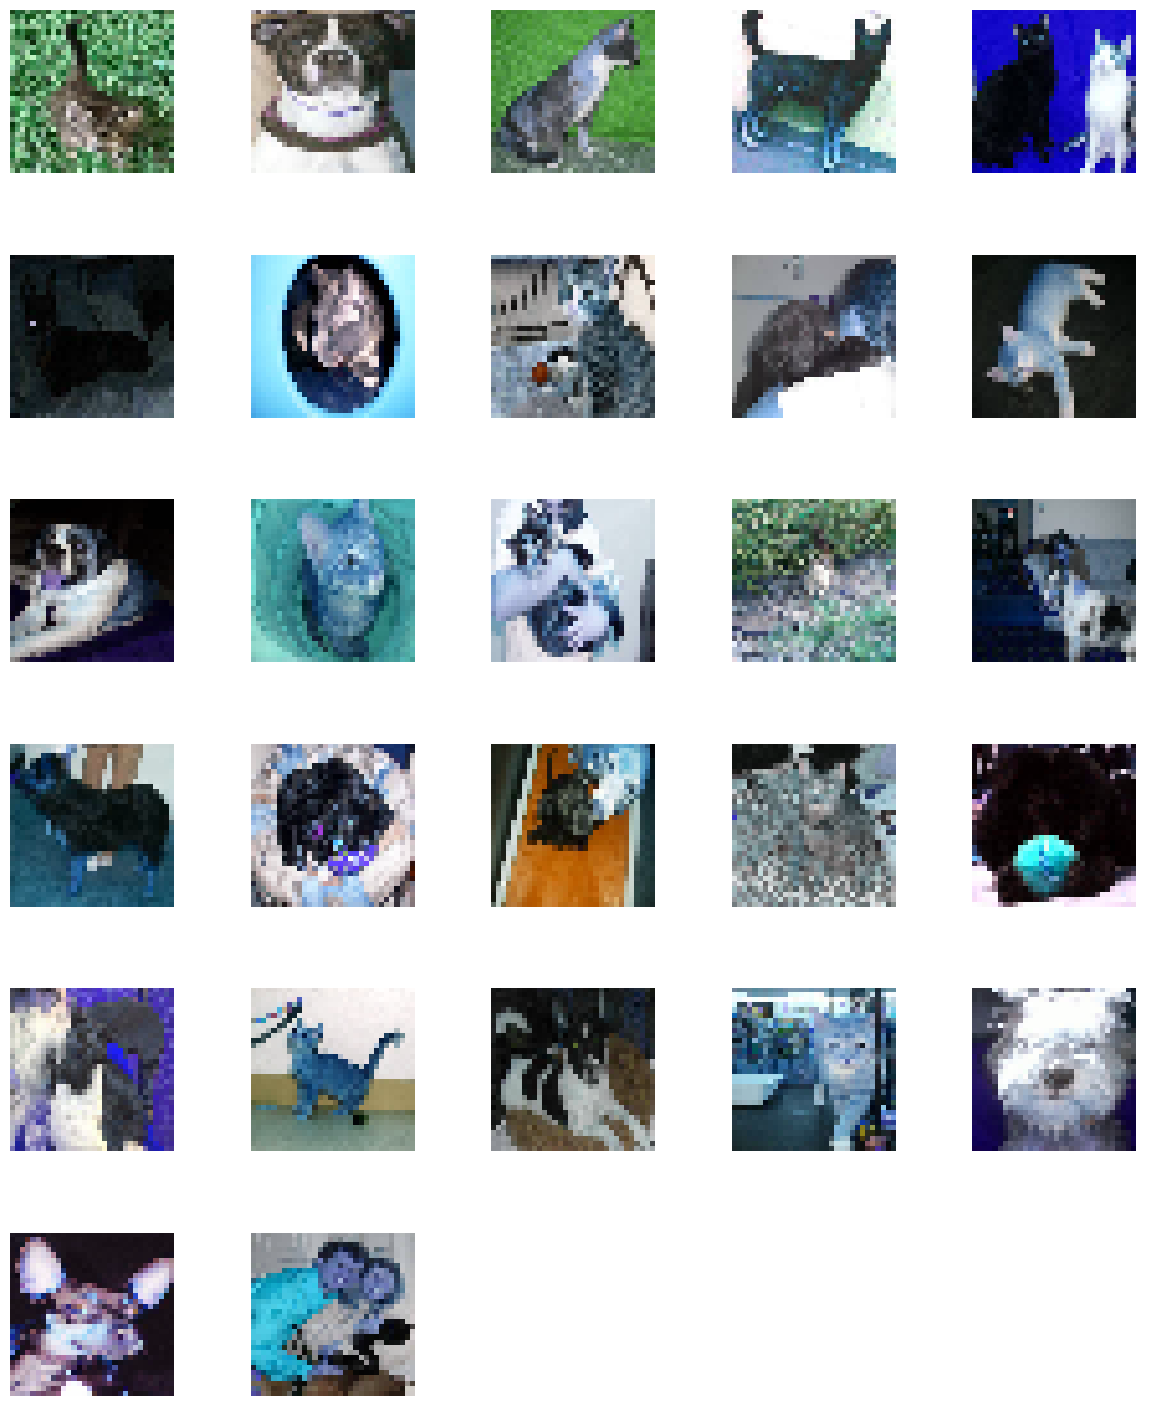

In [85]:
num_images = len(misclassified_images)

images_per_row = 5  

num_rows = (num_images // images_per_row) + (num_images % images_per_row > 0)

fig, axes = plt.subplots(num_rows, images_per_row, figsize=(15, num_rows * 3))

fig.subplots_adjust(hspace=0.5)

for idx, ax in enumerate(axes.flat):
    if idx < num_images:
        ax.imshow(misclassified_images[idx], cmap='gray') 
        ax.axis('off')  
    else:
        ax.axis('off')  

plt.show()